In [ ]:
# for colab
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
project_dir = '/content/gdrive/My Drive/ColabNotebooks/AI'
import sys
sys.path.insert(0, project_dir)

# Step by step mcts

In [1]:
from models import Model, mctsTrainer
from env_test import Env
from mcts import MCTS

class dotdict(dict):
    def __getattr__(self, name):
        return self[name]

model = Model()
env = Env()

args = dotdict({'cpuct':0.5, 'iters':1000})

In [3]:
%matplotlib inline

/home/denis/anaconda3/envs/tourch_gym/lib/python3.7/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


1ACC 1ACCA 0
1908


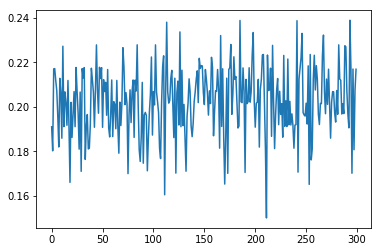

In [15]:

mcts = MCTS(env, model, args)
val = list(mcts.sampling())
print(len(val))
#val = [v for v in val if v.parent and v.parent.times_visited > 2]
#print(len(val))
t = mctsTrainer(env, mcts, batch_size=50)
t.train_model(val, model, net_iters=300)
#examples = deque([], maxlen=1000)

batch = t.get_batch(val, batch_size=5)
#for b in t.transform_bach_as_input(batch):
#    print(b)
import matplotlib.pyplot as plt

plt.plot(t.loss_backet)
plt.show()

In [11]:
from random import shuffle

In [17]:
def val_data(val):
    print(val.formula, val.fin_prob, val.ucb_score())

shuffle(val)
for i in range(30):
    val_data(val[i+1])

i1iB1 1.0 -0.23806680142879488
1iAAB1iCse1 1.0 -0.33806680142879486
1AeAB 1.0 0.026735728929042635
s1CABC 1.0 -0.3210567533969879
1AC1isA 1.0 -0.12406769180297861
iCiCAB 1.0 -0.2827742710709572
ieii1Co 1.0 -0.3754725158214569
CCeAo 1.0 -0.3754725158214569
i1ACABCo 1.0 -0.3754725158214569
isA1Co 1.0 -0.3754725158214569
1CCB1iss 1.0 -0.305239075422287
Bei 0.14285714285714285 1.1230145149699546
CAiABCiC 1.0 -0.13105675339698797
isCCABC 1.0 -0.3210567533969879
1eB 0.14285714285714285 1.1547288815368124
eCiB1C 1.0 -0.3210567533969879
CCsABCiCse1 1.0 -0.33806680142879486
iAACA 1.0 -0.20506769180297857
B1iiC 1.0 -0.3210567533969879
eC1i1C 1.0 -0.13105675339698797
1BeABCiCse1 1.0 -0.33806680142879486
Ae 0.1111111111111111 0.5462251863943132
iCBABCiCse 1.0 -0.38756171613931656
BeBABCiC 1.0 -0.13105675339698797
Ci1CA 1.0 -0.20506769180297857
s11B1Co 1.0 -0.3754725158214569
CCB1isA1 1.0 -0.14806680142879491
i1CCAB 1.0 -0.2827742710709572
CiAAB 1.0 0.026735728929042635
AC11i 1.0 0.0147488250827787

In [21]:
mcts.Nodes['i1iBo'].times_visited

KeyError: 'i1iBo'

In [14]:
t.transform_bach_as_input(t.get_batch(val))

(array([[0.5, 0.5, 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ,
         0. , 0. , 0. , 0. ],
        [0.5, 0.5, 1. , 0. , 1. , 0. , 1. , 0. , 0. , 1. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. ],
        [0.5, 0.5, 0. , 1. , 1. , 0. , 1. , 0. , 0. , 0. , 0. , 1. , 0. ,
         0. , 0. , 0. , 0. ],
        [0.5, 0.5, 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         1. , 0. , 0. , 0. ],
        [0.5, 0.5, 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ,
         0. , 0. , 0. , 0. ],
        [0.5, 0.5, 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         1. , 0. , 0. , 0. ],
        [0.5, 0.5, 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 1. , 0. , 0. ],
        [0.5, 0.5, 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 1. , 0. , 0. ],
        [0.5, 0.5, 1. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ,
         0. , 0. , 0. , 0. ],
        [0.5, 0.5, 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 

In [ ]:
import pandas as pd

In [ ]:
values = {'1': 1, 'i': 0, 'o': 0, 'A': 0, 'B': 0, 'C': 0}
keys=list(values) + ['s', 'e']

dd = {'formula':[], 'val_sum':[]}
for i in replay_buffer.replay:
    dd['formula'].append(i[2])
    dd['val_sum'].append(i[3].value_sum)
    
    for j, k in enumerate(keys):
        #print('j', j, i[4])
        #print(i, i[4][j])
        dd[k] = i[4][j]

df = pd.DataFrame(dd)

In [ ]:
df[df['formula']=='']#['ucb'].idxmax()

In [ ]:
df[df['formula']=='ie']#['ucb'].idxmax()

In [ ]:
replay_buffer.get_batch()

In [ ]:
import torch.nn.functional as F
from torch import Tensor
F.softmax(Tensor([0,0,0])).numpy()

In [ ]:
test_env.reset()
Vocab, Vocab[1]

In [ ]:
j.select_best_leaf().action

In [ ]:
j.select_best_leaf().rollout(env, 10)

In [ ]:
test_env.step(1)

In [ ]:
test_env.step(3)

In [ ]:
test_env.step(1)

In [ ]:
test_env.step(2)

In [ ]:
test_env.step(1)

In [ ]:
test_env.step(3)

# Imetation learning 
### if we already know answer we should show it to mcts tree.

In [ ]:
#text = "input_eq_A A[2]_eq_out"
def text_to_actions(text, vocab=Vocab):
    action_seq = []
    i = 0
    operator = ''
    while i < len(text):
        if text[i] in Vocab:
            action_seq.append(Vocab.index(text[i]))
        else:
            operator += text[i]
            #print('ss', text[i], operator)
            if operator == 'input':
                operator = ''
                
            if operator in Vocab:
                action_seq.append(Vocab.index(operator))
                operator = ''


        i += 1
    return action_seq

for i in text_to_actions(text):
    print(Vocab[i])
text_to_actions(text)
        #print(Vocab.index(i))
        #print(env.step(1))
        #print(env.step(Vocab.index(i)))

In [ ]:
env.reset()

In [ ]:
#text = "input_sum_A" 
for i in text_to_actions(text):
    print(i)
    print(Vocab[i])
    print(env.step(i))

In [ ]:
text = "input_eq_A A[2]_const_AA AA_eq_out" 
c = CalcNode(text)
c.calc(1)

In [ ]:
import importlib
#import mcts
importlib.reload(mcts)

In [ ]:
root_observation = env.reset()
root_snapshot = env.get_snapshot()
root = mcts.Root(root_snapshot,root_observation)

#plan_mcts(root, env, n_iters=10000, t_max=20)

In [ ]:
root.is_leaf()

In [ ]:
while True:
    is_done = env.step(env.action_space.sample())[2]
    if is_done: 
        print("Whoops! We died!")
        break
        
print("final state:")
plt.imshow(env.render('rgb_array'))
plt.show()


In [ ]:
def teach_mcts(root, env, action_seq):
    """
    builds tree with monte-carlo tree search for n_iters iterations
    :param root: tree node to plan from
    :param n_iters: how many select-expand-simulate-propagete loops to make
    """
    #node = root
    #node = mcts.Node(root, action_seq[0], env)
    #root.children.add(node)
    for action in action_seq:
        #print(action)
        #print(node.is_done)
        
        #next_node = mcts.Node(next_node, action, env)
        #node.children.add(mcts.Node(node, action, env))
        #node = next_node
        
        #print(node.is_done)
        node = root.select_best_leaf()
        
        #print(Vocab[node.action])
        
        if node.is_done:
            if node.immediate_reward > 0:
                print("get_reward mcts plan!", node.immediate_reward)  
            
            node.propagate(0)
            #env.reset()
       
        else: #node is not terminal
            
            #print(_)
            #env.reset()
            #self.env.close()
            #self.render()
            node.expand(env)
            #print(Vocab[node.action])
            for i in node.children:
                print('dd', )#Vocab[node.action], node.parent.action)
            ## value = node.rollout(env, 10)
            #if value >0:
            #    print('plan after rolout', value, node.action)
            ##node.propagate(value)

In [ ]:
teach_mcts(root, env, text_to_actions(text))

In [ ]:
p = mcts.Node(root, 2, env)
#p.is_leaf()

In [ ]:
mcts.plan_mcts(root,env)

In [ ]:
for i in root.children:
    print(Vocab[i.action], i.value_sum, len(i.children))

In [ ]:
j = root
while j.children:
    j = j.children.pop()
    print(j.action, len(j.children))